* If you is first time run, you need to follow from head to tail in this file
* If you is second time run, you do not need follow from head to tail in this file, only need run the code cell I comment #need run

* I recommend you use google colab, so this you can follow correct my instructor and avoid error
* If you use local machine like vscode, this file can run ok but you meet many error or can chane code many time and in this instructor I use google colab

First you need to open google drive, create new folder with name sign_language_detection

# **I.Mount drive and setup environment**

In [ ]:
#need run
from google.colab import drive #if you use local machine, skip this cell
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install opendatasets #install opendatasets library

# **II.Dowload dataset**

You need to username and key to download dataset, click the link and follow to the instruction to take username and key of your kaggle account https://github.com/JovianHQ/opendatasets

In [ ]:
#You need to dowload data to new folder name sign_language_detection
#You need to change the data_dir to be the path that will contain the data after dowload(the path on drive: "/content/drive/Mydrive/....sign_language_detection/Datasets_SignLanguage_other")
#This data I dowload from kaggle and use to predict, not train
import opendatasets as od
od.download('https://www.kaggle.com/datasets/ardamavi/sign-language-digits-dataset', data_dir="/content/drive/MyDrive/Home/Mini_Project/6_Sign_Language_Detection/Datasets_SignLanguage_other")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: luongtuananh
Your Kaggle Key: ··········


100%|██████████| 16.8M/16.8M [00:00<00:00, 138MB/s]

# **III.Import library**

In [ ]:
#need run
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
import cv2
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf

#import neccessary library

# **IV.Load data**

* You need to dowload folder with name data_hand from the link to local machine
* Contact me to get the link of dataset

* After that you upload folder data_hand to the sign_language_detection folder in your drive

* Then copy the path of data_hand folder after upload to your drive to file_path in the code below

In [ ]:
#You need to change the data_dir to be the path that will contain the data after dowload(the path can on drive ex: "/content/drive/Mydrive/....sign_language_detection/data_hand")
#this data I collect from camera and use to train
lst_folder = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
file_path = "/content/drive/MyDrive/Home/Mini_Project/6_Sign_Language_Detection/data_hand"
data = []
labels = []
for i in lst_folder:
  folder_name = "hand_" + str(i)
  path = os.path.join(file_path, folder_name)
  for file_name in os.listdir(path):
    path1 = os.path.join(path, file_name)
    img = cv2.imread(path1)
    img = cv2.resize(img, (64, 64))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    data.append(img)
    labels.append(i)
    print("ok")

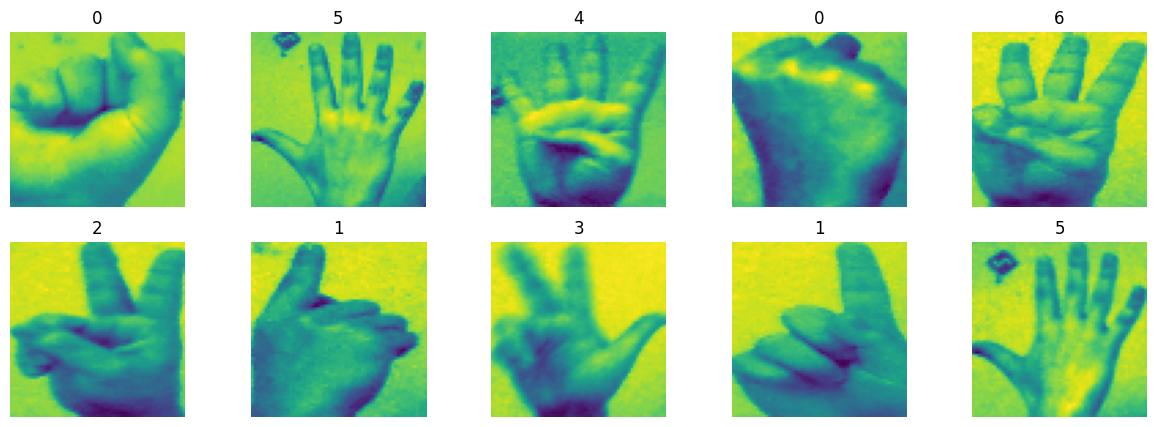

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5))

for i in range(1, 11):
  plt.subplot(2, 5, i)
  number = np.random.randint(0, 1000)
  plt.imshow(data[number].reshape(64, 64))
  plt.title(str(labels[number]))
  plt.axis("off")

In [ ]:
data = np.array(data)
labels = to_categorical(labels)

In [ ]:
data.shape

(1500, 64, 64)

In [ ]:
labels.shape

(1500, 10)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 17, stratify = labels)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)

# **V.Build model**

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = "same", activation = "relu", input_shape = (64,64,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       2

# **VI.Training model**

* Create the name of file .h5: best_model_sign_language_other3.h5
* Create the name of folder log: logs_sign_language_other3
* Copy the path of sign_language_detection folder in your drive
* Combined the path of sign_language_detection folder with two name you create above, you will 2 path like this:
* '/content/drive/MyDrive/.....sign_language_detection/best_model_sign_language_other3.h5'
* '/content/drive/MyDrive/.....sign_language_detection/logs_sign_language_other3'
* Copy to path to the filepath and log_dir in the code below

* Note: best_model_sign_language_other3.h5 and logs_sign_language_other3 folder will create after you run train model(model.fit), and do not create this folder or this file, you only need to create the name and after you will run .fit and train complete you will see best_model_sign_language_other3.h5 and logs_sign_language_other3 folder appear in sign_language_detection folder on your drive

In [ ]:
#You need to change path in filepath and log_dir to your path
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Home/Mini_Project/6_Sign_Language_Detection/best_model_sign_language_other3.h5',
                                                         monitor='val_accuracy',
                                                         save_best_only=True,
                                                         save_weights_only=False,
                                                         mode='max',
                                                         verbose=1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/Home/Mini_Project/6_Sign_Language_Detection/logs_sign_language_other3',
                                                       histogram_freq=1,
                                                       write_graph=True,
                                                       write_images=True)

In [ ]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs = 50, validation_data = (x_test,y_test), callbacks=[checkpoint_callback, tensorboard_callback])

Epoch 1/50
38/38 [==============================] - ETA: 0s - loss: 2.4227 - accuracy: 0.2517
Epoch 1: val_accuracy improved from -inf to 0.10000, saving model to /content/drive/MyDrive/Home/Mini_Project/6_Sign_Language_Detection/best_model_sign_language_other3.h5
38/38 [==============================] - 16s 52ms/step - loss: 2.4227 - accuracy: 0.2517 - val_loss: 2.5653 - val_accuracy: 0.1000
Epoch 2/50
34/38 [=========================>....] - ETA: 0s - loss: 1.3070 - accuracy: 0.5460
Epoch 2: val_accuracy did not improve from 0.10000
38/38 [==============================] - 1s 27ms/step - loss: 1.2923 - accuracy: 0.5533 - val_loss: 3.4992 - val_accuracy: 0.1000
Epoch 3/50
35/38 [==========================>...] - ETA: 0s - loss: 0.6872 - accuracy: 0.7795
Epoch 3: val_accuracy did not improve from 0.10000
38/38 [==============================] - 1s 27ms/step - loss: 0.6637 - accuracy: 0.7883 - val_loss: 5.3087 - val_accuracy: 0.1000
Epoch 4/50
34/38 [=========================>....] - ET

# **VII.Evaluate model**

Text(0.5, 1.0, 'Evaluate accuracy')

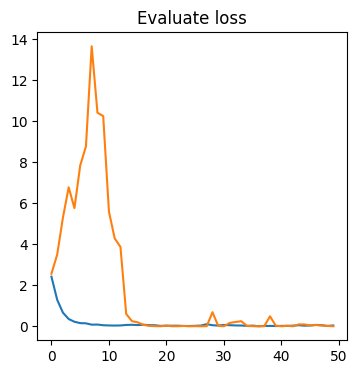

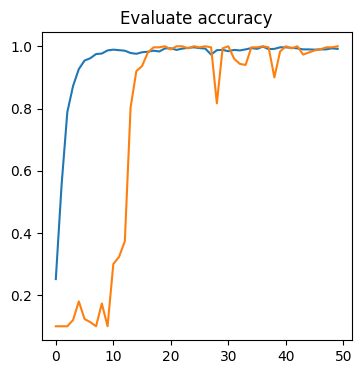

In [ ]:
plt.figure(figsize = (4, 4))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Evaluate loss")

plt.figure(figsize = (4, 4))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Evaluate accuracy")


In [ ]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 6ms/step - loss: 8.9130e-04 - accuracy: 1.0000


[0.0008913018391467631, 1.0]

# **VIII.Prediction**

In [ ]:
#need run
#You need to change path in filepath in load_model
model_load = tf.keras.models.load_model("/content/drive/MyDrive/Home/Mini_Project/6_Sign_Language_Detection/best_model_sign_language_other3.h5")

In [ ]:
#need run
#You need to change path in filepath and log_dir to your path
x = np.load("/content/drive/MyDrive/Home/Mini_Project/6_Sign_Language_Detection/Datasets_SignLanguage_other/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy")
y = np.load("/content/drive/MyDrive/Home/Mini_Project/6_Sign_Language_Detection/Datasets_SignLanguage_other/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy")

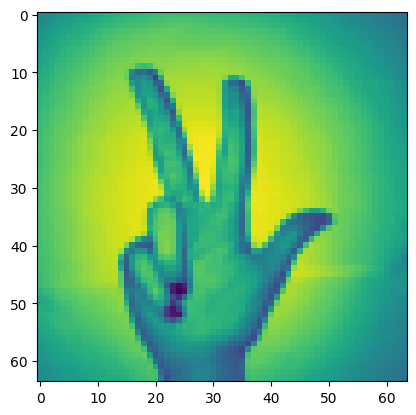

In [ ]:
#need run
digits = np.random.randint(0, 2062)
x_pred = x[digits]
plt.imshow(x_pred)

In [ ]:
#need run
x_pred = cv2.resize(x_pred, (64, 64))
x_pred = img.reshape(-1, 64, 64, 1)
x_pred.shape

(1, 64, 64, 1)

In [ ]:
#need run
y_pred = model_load.predict(x_pred)
y_pred = np.argmax(y_pred, axis = 1)
y_pred

1/1 [==============================] - 0s 20ms/step


array([3])